##### In this Project, we're looking at building a Covolutional AutoEncoder encoding input images into a latent space and decoding them through a decoder


In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D
from keras.models import Model,Sequential
from keras import backend as K
import numpy as np
import keras

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

##### Data Preprocessing
##### Scaling the data to have pixel values between 0 and 1

In [2]:
train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

In [3]:
x_train = train_data.flow_from_directory('C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\AUTOENCODERS\\Training\\',
                                         target_size=(64, 64),
                                         batch_size=10,
                                         class_mode='input')

Found 355 images belonging to 1 classes.


In [4]:
x_test = test_data.flow_from_directory('C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\AUTOENCODERS\\Testing\\',
                                       target_size=(64, 64),
                                       batch_size=5,
                                       class_mode='input')

Found 69 images belonging to 1 classes.


##### Building the AutoEncoder Model
##### Encoder

In [5]:
encoder_input = keras.layers.Input(
shape=(64, 64, 3), name = "encoder_input")
x = keras.layers.Conv2D(32, (3, 3), strides = 2, activation = 'relu',padding="same")(encoder_input)
x = keras.layers.Conv2D(64, (3, 3), strides = 2, activation = 'relu',padding="same")(x)
x = keras.layers.Conv2D(128, (3, 3), strides = 2, activation = 'relu',padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]
x = keras.layers.Flatten()(x)
encoder_output = keras.layers.Dense(2, name="encoder_output")(x)
encoder = keras.models.Model(encoder_input, encoder_output)


##### Decoder

In [6]:
decoder_input = keras.layers.Input(shape=(2,), name="decoder_input")
x = keras.layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = keras.layers.Reshape(shape_before_flattening)(x)
x = keras.layers.Conv2DTranspose(128, (3, 3), strides=2, activation = 'relu', padding="same")(x)
x = keras.layers.Conv2DTranspose(64, (3, 3), strides=2, activation = 'relu', padding="same")(x)
x = keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation = 'relu', padding="same")(x)
decoder_output = keras.layers.Conv2D(
3,
(3, 3),
strides = 1,
activation="sigmoid",
padding="same",
name="decoder_output"
)(x)
decoder = keras.models.Model(decoder_input, decoder_output)

In [7]:
autoencoder = Model(encoder_input, decoder(encoder_output))

In [8]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [9]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 encoder_output (Dense)      (None, 2)                 16386     
                                                                 
 model_1 (Functional)        (None, 64, 64, 3)         2652

In [11]:
autoencoder.fit(
x_train,
epochs=5,
batch_size=10,
shuffle=True,
validation_data=x_test,
)

Epoch 1/5

36/36 [==============================] - 152s 3s/step - loss: 0.6899 - val_loss: 0.6891
Epoch 2/5
36/36 [==============================] - 13s 368ms/step - loss: 0.6597 - val_loss: 0.6181
Epoch 3/5
36/36 [==============================] - 14s 384ms/step - loss: 0.6114 - val_loss: 0.5936
Epoch 4/5
36/36 [==============================] - 13s 374ms/step - loss: 0.5978 - val_loss: 0.5905
Epoch 5/5
36/36 [==============================] - 15s 418ms/step - loss: 0.5930 - val_loss: 0.5833


##### Visualizing the Images in the Latent Space

36/36 [==============================] - 7s 200ms/step


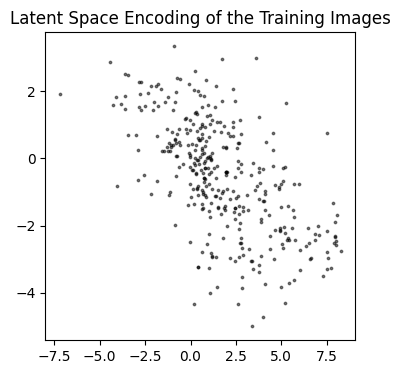

In [19]:
embeddings = encoder.predict(x_train)
plt.figure(figsize=(4, 4))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5,s=3)
plt.title('Latent Space Encoding of the Training Images')
plt.show()

##### Saving the Encoder, Decoder and the AutoEncoder

In [21]:
encoder.save('Convolutional-Encoder.h5')

c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
decoder.save('Convolutional-Decoder.h5')

In [23]:
autoencoder.save('Convolutional-AutoEncoder.h5')